# Importing Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
!pip install imbalanced-learn

In [ ]:
df = pd.read_csv('/content/bangalore-cas-alerts.csv')

In [ ]:
df.head(10)

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
5,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
7,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z
9,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z


In [ ]:
#Checking missing values
df.isnull().sum()

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
dtype: int64

In [ ]:
# Remove two columns name is 'C' and 'D'
df = df.drop(['deviceCode_deviceCode', 'deviceCode_location_wardName', 'deviceCode_time_recordedTime_$date'], axis=1)

In [ ]:
df.head(10)

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_alarmType,deviceCode_pyld_speed
0,12.984595,77.744087,PCW,32
1,12.984595,77.744087,PCW,32
2,12.987233,77.741119,FCW,41
3,12.987233,77.741119,FCW,41
4,12.987503,77.740051,Overspeed,37
5,12.987503,77.740051,Overspeed,37
6,12.987523,77.736702,HMW,32
7,12.987523,77.736702,HMW,32
8,12.988210,77.731369,Overspeed,27
9,12.988210,77.731369,Overspeed,27


# Sampling Count

In [ ]:
df['deviceCode_pyld_alarmType'].value_counts()

UFCW         82425
HMW          36143
FCW          35000
Overspeed    27440
PCW          24003
LDWL          1412
LDWR          1194
Name: deviceCode_pyld_alarmType, dtype: int64

In [ ]:
#from imblearn.over_sampling import SMOTE
y = df.deviceCode_pyld_alarmType
x = df.drop(['deviceCode_pyld_alarmType'], axis=1)
x.head()

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_speed
0,12.984595,77.744087,32
1,12.984595,77.744087,32
2,12.987233,77.741119,41
3,12.987233,77.741119,41
4,12.987503,77.740051,37


In [ ]:
x.shape, y.shape

((207617, 3), (207617,))

In [ ]:
y.value_counts()

UFCW         82425
HMW          36143
FCW          35000
Overspeed    27440
PCW          24003
LDWL          1412
LDWR          1194
Name: deviceCode_pyld_alarmType, dtype: int64

# Encoding and Scaling

In [ ]:
y_res, label = pd.factorize(y)

In [ ]:
print(label)

Index(['PCW', 'FCW', 'Overspeed', 'HMW', 'UFCW', 'LDWL', 'LDWR'], dtype='object')


In [ ]:
print(y.head())

0          PCW
1          PCW
2          FCW
3          FCW
4    Overspeed
Name: deviceCode_pyld_alarmType, dtype: object


In [ ]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [ ]:
x.head()

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_speed
0,0.513739,0.743451,0.712843
1,0.513739,0.743451,0.712843
2,0.610233,0.643886,1.367383
3,0.610233,0.643886,1.367383
4,0.620106,0.608053,1.076476


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(145331, 3)
(62286, 3)
(145331,)
(62286,)


# Implementing ML Algorithms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy = knn.score(x_test, y_test)
knn_accuracy

0.6406576116623318

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dt_accuracy=dt.score(x_test, y_test)
dt_accuracy

0.7457213499020646

In [ ]:
#Random Forest with best accuracy
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(random_state=5)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
#pred_randf_with_categorical_value = le.inverse_transform(pred_randf)
#print(pred_randf_with_categorical_value)
randf_accuracy = randf.score(x_test, y_test)
randf_accuracy

0.7704941720450824

In [ ]:
print(pred_randf.shape)

(62286,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)
gb.fit(x_train,y_train)
gb_accuracy=gb.score(x_test, y_test)
gb_accuracy

0.6064926307677487

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(random_state=5)
adab.fit(x_train,y_train)
adab_accuracy=adab.score(x_test, y_test)
adab_accuracy

0.5070160228622804

In [ ]:
pip uninstall xgboost

Found existing installation: xgboost 2.0.3
Uninstalling xgboost-2.0.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xgboost-2.0.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/xgboost/*
Proceed (Y/n)? y
  Successfully uninstalled xgboost-2.0.3


In [ ]:
pip install xgboost==0.90

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 5.8 MB/s eta 0:00:00


In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_accuracy=xgb.score(x_test, y_test)
xgb_accuracy

0.5928459043765855

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train, y_train)
logreg_accuracy=logreg.score(x_test, y_test)
logreg_accuracy

0.5238737436984234

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy=nb.score(x_test, y_test)
nb_accuracy

0.5247086022541181

# Saving above ML Models

In [ ]:
import joblib as jb

In [ ]:
#Saving models using Joblib
jb.dump(knn,'knn')
jb.dump(dt,'dt')
jb.dump(randf,'randf')
jb.dump(gb,'gb')
jb.dump(adab,'adab')
jb.dump(xgb,'xgb')
jb.dump(logreg,'logreg')
jb.dump(nb,'nb')

['nb']

In [ ]:
#Loading those saved models
import joblib as jb
knn_default = jb.load('knn')
dt_default =  jb.load('dt')
randf_default =  jb.load('randf')
gb_default =  jb.load('gb')
adab_default =  jb.load('adab')
xgb_default =  jb.load('xgb')
logreg_default =  jb.load('logreg')
nb_default =  jb.load('nb')

In [ ]:
#Printing accuracy from the saved model files
print("KNN accuracy           : ", knn_default.score(x_test,y_test))
print("Decision Tree accuracy : ", dt_default.score(x_test,y_test))
print("Random Forest accuracy : ", randf_default.score(x_test,y_test))
print("Gradient Boosting      : ", gb_default.score(x_test,y_test))
print("AdaBoost accuracy      : ", adab_default.score(x_test,y_test))
print("XGBoost accuracy       : ", xgb_default.score(x_test,y_test))
print("Logistic Regression    : ", logreg_default.score(x_test,y_test))
print("Naive Bayes accuracy   : ", nb_default.score(x_test,y_test))

KNN accuracy           :  0.6406576116623318
Decision Tree accuracy :  0.7457213499020646
Random Forest accuracy :  0.7704941720450824
Gradient Boosting      :  0.6064926307677487
AdaBoost accuracy      :  0.5070160228622804
XGBoost accuracy       :  0.5928459043765855
Logistic Regression    :  0.5238737436984234
Naive Bayes accuracy   :  0.5247086022541181


# Model Performance Evaluation

### Accuracy Comparison of Algorithms

In [ ]:
d = {'Algorithm': ['K Nearest Neighbors', 'Decision Tree',
                   'Random Forest','Gradient Boost','Adaboost','XGBoost','Logistic Regression','Naive Bayes'],
     'Accuracy (in percent)': [64.06,74.57,77.04,60.64,50.70,59.28,52.38,52.47]}
df_accuracy = pd.DataFrame(data=d)
df_accuracy

,Algorithm,Accuracy (in percent)
0,K Nearest Neighbors,64.06
1,Decision Tree,74.57
2,Random Forest,77.04
3,Gradient Boost,60.64
4,Adaboost,50.70
5,XGBoost,59.28
6,Logistic Regression,52.38
7,Naive Bayes,52.47


<ipython-input-37-1ce3ed2c7e6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))


Text(0, 0.5, 'Accuracy (in percent)')

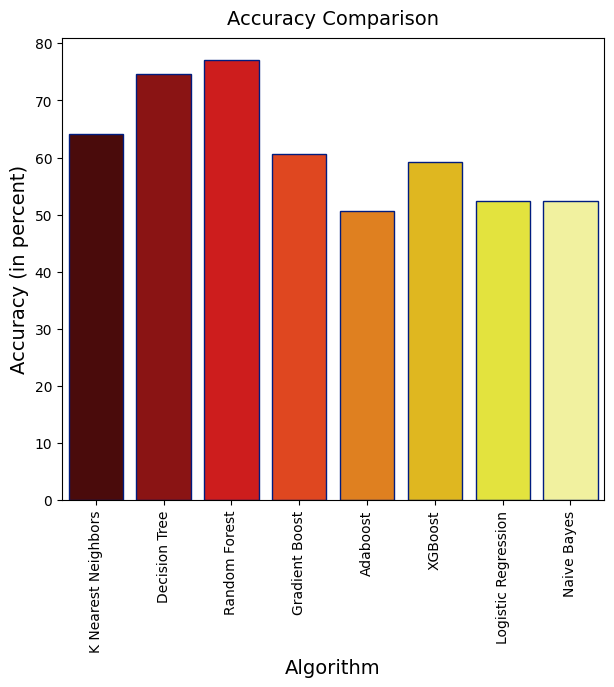

In [ ]:
plt.figure(figsize=(7,6))
plt.title('Accuracy Comparison',fontsize=14, pad = 10.0)
p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
p.set_xlabel('Algorithm', fontsize=14)
p.set_ylabel('Accuracy (in percent)', fontsize=14)
#p.bar_label(p.containers[0])
#plt.savefig('Accuracy Comparison', dpi=300);